In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
     

In [2]:
df=pd.read_csv('patient_data (1).csv')
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [3]:
df.rename(columns={"C":"Gender"},inplace=True)
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [4]:
df.shape

(1825, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [6]:
for col in df.columns:
  print(f"Unique values in {col}: ")
  print(df[col].unique())


Unique values in Gender: 
['Male' 'Female']
Unique values in Age: 
['18-34' '35-50' '51-64' '65+']
Unique values in History: 
['Yes' 'No']
Unique values in Patient: 
['No' 'Yes']
Unique values in TakeMedication: 
['No' 'Yes ' 'Yes']
Unique values in Severity: 
['Mild' 'Sever' 'Moderate']
Unique values in BreathShortness: 
['No' 'Yes']
Unique values in VisualChanges: 
['No' 'Yes']
Unique values in NoseBleeding: 
['No ' 'No' 'Yes']
Unique values in Whendiagnoused: 
['<1 Year' '1 - 5 Years' '>5 Years']
Unique values in Systolic: 
['111 - 120' '121- 130' '130+' '100+' '121 - 130']
Unique values in Diastolic: 
['81 - 90' '91 - 100' '100+' '130+' '70 - 80']
Unique values in ControlledDiet: 
['No' 'Yes']
Unique values in Stages: 
['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (Stage-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


In [7]:
df['TakeMedication'].replace(to_replace={'Yes ':'Yes'},inplace=True)
df['TakeMedication'].unique()
     

array(['No', 'Yes'], dtype=object)

In [8]:
df['NoseBleeding'].replace(to_replace={'No ':'No'},inplace=True)
df.NoseBleeding.unique()

array(['No', 'Yes'], dtype=object)

In [9]:

df['Systolic'].replace(to_replace={'121- 130':'121 - 130'},inplace=True)
df['Systolic'].unique()

array(['111 - 120', '121 - 130', '130+', '100+'], dtype=object)

In [10]:

df['Stages'].replace(to_replace={'HYPERTENSIVE CRISI':'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).':'HYPERTENSION (Stage-2)'},inplace=True)
df.Stages.unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [11]:

df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [12]:
df['Stages'].value_counts()

Stages
HYPERTENSION (Stage-1)    648
HYPERTENSION (Stage-2)    600
NORMAL                    336
HYPERTENSIVE CRISIS       241
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}
target_encoder = LabelEncoder()

# Encoding X columns (all except 'Stages')
for col in df.columns:
    if col != 'Stages' and df[col].dtype == 'object':
        df[col] = df[col].str.strip()  # clean strings
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encoding target column separately
df['Stages'] = df['Stages'].str.strip()
df['Stages'] = target_encoder.fit_transform(df['Stages'])

# Saving encoders
with open('encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('stage_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)
     

In [14]:
df

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,0,1,1,3,0,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0,3
1821,1,2,1,0,0,2,0,0,0,2,1,2,0,3
1822,0,2,1,0,0,2,0,0,0,2,1,2,0,3
1823,1,3,1,0,0,2,0,0,0,2,1,2,0,3


In [15]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,1.441096,0.907945,0.460822,0.592329,1.013151,0.465205,0.484932,0.243836,1.026301,1.572603,2.717808,0.460822,1.145205
std,0.500137,1.098723,0.289183,0.498599,0.491536,0.786287,0.498925,0.499910,0.429512,0.810680,0.712756,1.256490,0.498599,1.096876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000


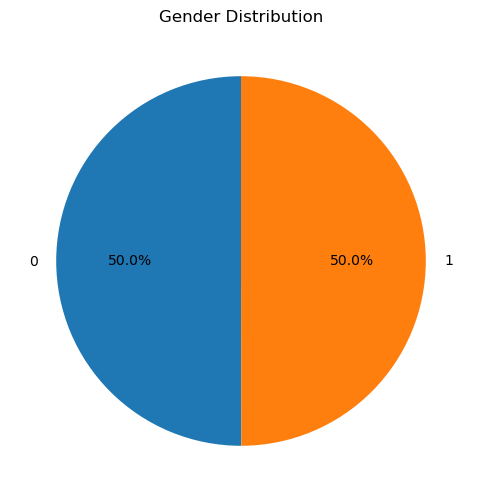

In [16]:
gender_counts=df['Gender'].value_counts()

#Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

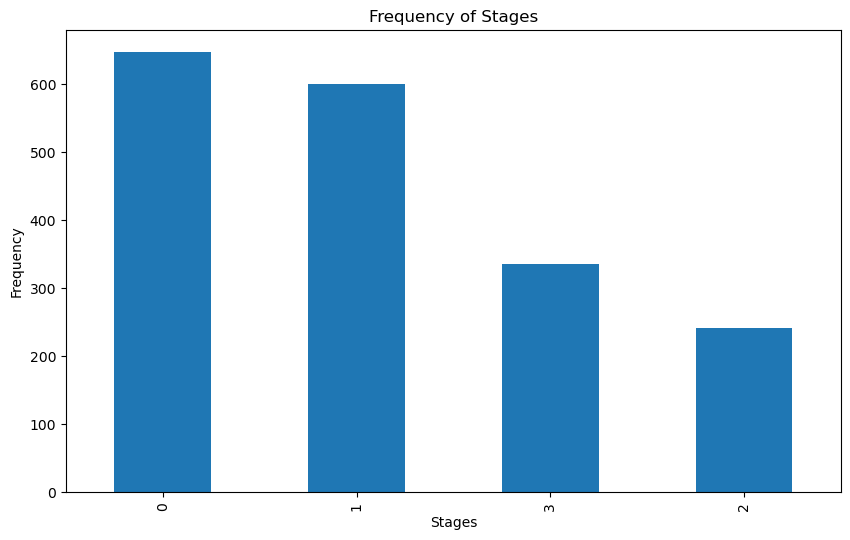

In [17]:

frequency=df['Stages'].value_counts()

frequency.plot(kind='bar',figsize=(10,6))
plt.title('Frequency of Stages')
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.show()

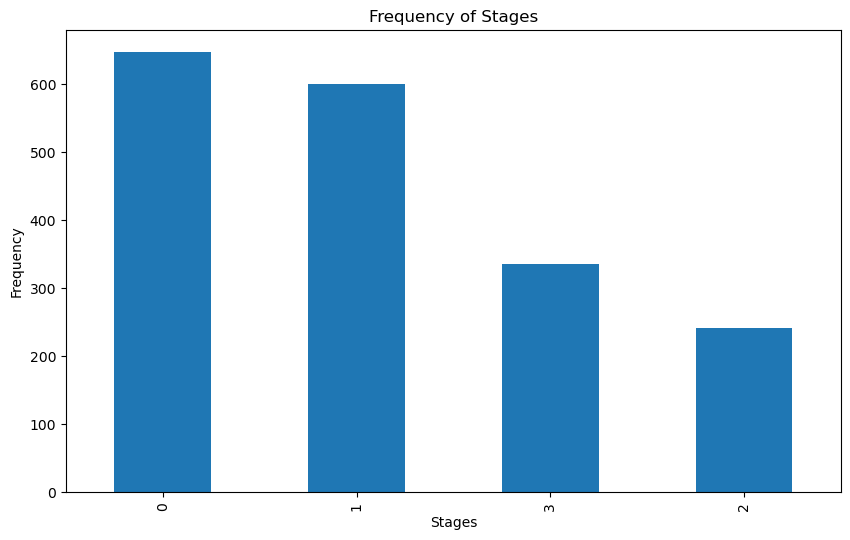

In [18]:

frequency=df['Stages'].value_counts()

frequency.plot(kind='bar',figsize=(10,6))
plt.title('Frequency of Stages')
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.show()

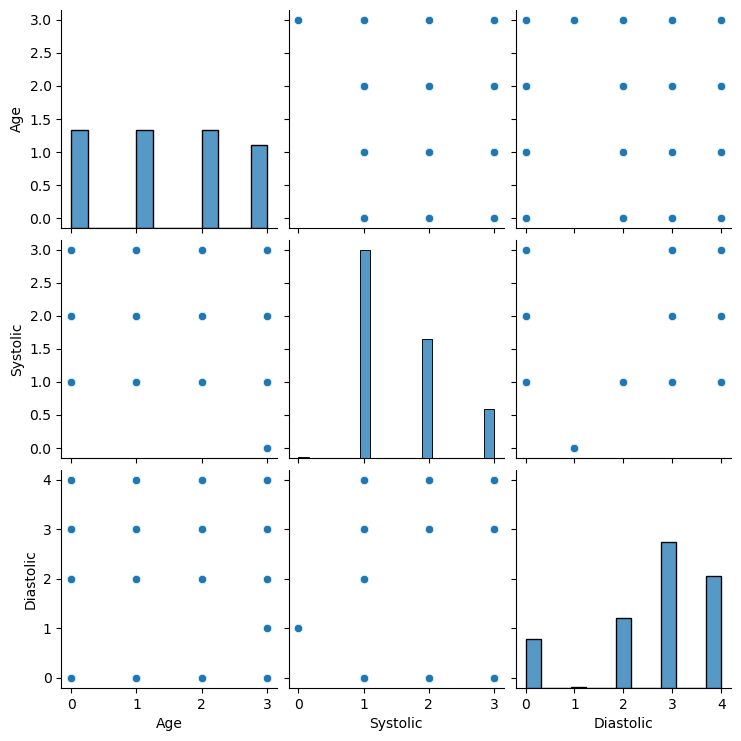

In [20]:
sns.pairplot(df[['Age','Systolic','Diastolic']])
plt.show()
     

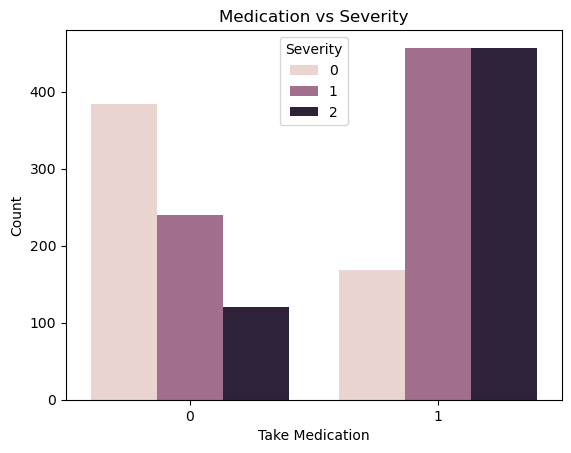

In [21]:
sns.countplot(x='TakeMedication', hue='Severity',data=df)
plt.title('Medication vs Severity')
plt.xlabel('Take Medication')
plt.ylabel('Count')
plt.show()

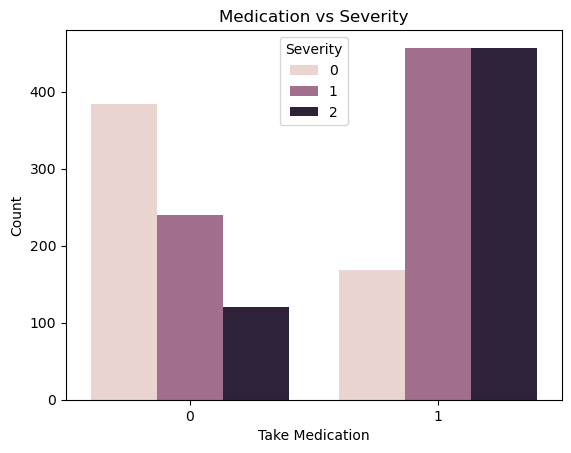

In [22]:
sns.countplot(x='TakeMedication', hue='Severity',data=df)
plt.title('Medication vs Severity')
plt.xlabel('Take Medication')
plt.ylabel('Count')
plt.show()

In [23]:

X=df.drop('Stages',axis=1)
y=df['Stages']

In [24]:
X

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,1,3,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0
1821,1,2,1,0,0,2,0,0,0,2,1,2,0
1822,0,2,1,0,0,2,0,0,0,2,1,2,0
1823,1,3,1,0,0,2,0,0,0,2,1,2,0


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int64

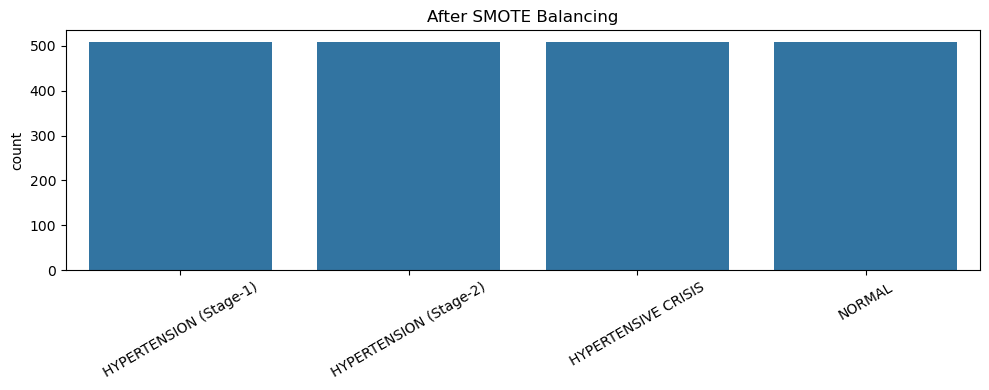

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
     

from imblearn.over_sampling import SMOTE

# SMOTE balancing(Handling Imbalanced Data)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualizing class distribution after balancing
decoded_y_res = target_encoder.inverse_transform(y_train_res)
plt.figure(figsize=(10, 4))
sns.countplot(x=decoded_y_res, order=target_encoder.classes_)
plt.title("After SMOTE Balancing")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier

In [31]:
pipeline= Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('scaling',StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num_pipeline', pipeline, X.columns)])# as all cols are numerical
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)
     

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [33]:

models={'Logistic Regression':LogisticRegression(),
        'Random Forest Classifier':RandomForestClassifier(),
        'Decision Tree Classifier':DecisionTreeClassifier(),
        'GaussianNB' :GaussianNB(),
        'MultinomialNB ':MultinomialNB(),
        'support vector machine' :SVC(),
        'Decision Tree Classifier':DecisionTreeClassifier(),
        }


models
     

{'Logistic Regression': LogisticRegression(),
 'Random Forest Classifier': RandomForestClassifier(),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB ': MultinomialNB(),
 'support vector machine': SVC()}

In [34]:
def model_train_eval(X_train, y_train, X_test, y_test, models):
    evaluation = {}
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            evaluation[name] = accuracy_score(y_test, y_pred)
        except ValueError as e:          # catches the NB error (or any other)
            print(f"⚠️  Skipped {name}: {e}")
            evaluation[name] = None
    return evaluation

results = model_train_eval(X_train, y_train, X_test, y_test, models)
results



⚠️  Skipped MultinomialNB : Negative values in data passed to MultinomialNB (input X).


{'Logistic Regression': 0.9863013698630136,
 'Random Forest Classifier': 1.0,
 'Decision Tree Classifier': 1.0,
 'GaussianNB': 0.8904109589041096,
 'MultinomialNB ': None,
 'support vector machine': 0.9863013698630136}

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# using gridsearchCV doing Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[1, 2, 3,5,10,None],
        'n_estimators':[50, 100,200,300],
        'criterion':['gini','entropy']}
     
clf=RandomizedSearchCV(rf,param_distributions=params,cv=5,n_iter=10,verbose=3)
     
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.973 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.986 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.973 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.983 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=50;, score=0.952 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.500 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.555 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.661 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.558 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.620 total time=   0.2s

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 5, 10, None],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=3)

In [36]:

clf.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

In [37]:

clf.best_score_

np.float64(1.0)

In [38]:
clf=clf.best_estimator_

In [39]:
clf

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [40]:
pickle.dump(clf,open('model.pkl','wb'))

     

df.Gender
     

0       1
1       0
2       1
3       0
4       1
       ..
1820    0
1821    1
1822    0
1823    1
1824    0
Name: Gender, Length: 1825, dtype: int64

In [41]:
df.Age

0       0
1       0
2       1
3       1
4       2
       ..
1820    1
1821    2
1822    2
1823    3
1824    3
Name: Age, Length: 1825, dtype: int64

In [42]:

df.Systolic.sample(15)

722     1
176     1
1369    2
1638    1
726     2
468     1
751     1
1687    1
474     1
1236    2
1023    1
174     1
1439    3
714     2
1145    1
Name: Systolic, dtype: int64

In [43]:

df.Stages.sample(10)

1465    0
1018    1
715     1
847     0
988     2
239     2
868     1
216     0
278     0
366     1
Name: Stages, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example: assume X and y are already defined
# X = your features (e.g., DataFrame or numpy array)
# y = your labels

# 1. Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# 3. Make predictions
y_pred = logistic_regression.predict(x_test)

# 4. Evaluate performance
acc_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc_lr)
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9616438356164384
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       139
           1       1.00      0.93      0.97       120
           2       0.85      1.00      0.92        46
           3       0.92      0.98      0.95        60

    accuracy                           0.96       365
   macro avg       0.94      0.97      0.95       365
weighted avg       0.97      0.96      0.96       365



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Example dataset (replace with your actual data)
# X = your feature matrix
# y = your labels

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
mNB = MultinomialNB()
mNB.fit(x_train, y_train)

# Predict
y_predNB = mNB.predict(x_test)

# Accuracy
acc_mnb = accuracy_score(y_test, y_predNB)
print("MultinomialNB Accuracy:", acc_mnb)


MultinomialNB Accuracy: 0.7945205479452054


In [50]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train, y_train)

y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)

c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)

print(c_nb)

Accuracy Score:  0.8904109589041096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      0.67      0.80       120
           2       0.53      1.00      0.70        46
           3       1.00      1.00      1.00        60

    accuracy                           0.89       365
   macro avg       0.88      0.92      0.87       365
weighted avg       0.94      0.89      0.90       365



In [51]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()

MNB.fit(x_train, y_train)

y_pred = NB.predict(x_test)

acc_mnb = accuracy_score(y_test,y_pred)

c_mnb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_mnb)

print(c_mnb)

Accuracy Score:  0.8904109589041096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      0.67      0.80       120
           2       0.53      1.00      0.70        46
           3       1.00      1.00      1.00        60

    accuracy                           0.89       365
   macro avg       0.88      0.92      0.87       365
weighted avg       0.94      0.89      0.90       365



In [65]:
prediction = random_forest.predict([[0,3,0,2,0,0,1,6,0.0,0.0,0]])
prediction [0]

NameError: name 'random_forest' is not defined

In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load example data
data = load_iris()
X = data.data
y = data.target

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Predict and evaluate
y_pred = decision_tree_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [59]:
# 1. Import required libraries
from sklearn.datasets import load_iris  # You can replace this with your own dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load example dataset (Iris dataset used here)
data = load_iris()
X = data.data         # Features
y = data.target       # Labels

# 3. Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# 5. Make predictions on the test set
y_pred = decision_tree_model.predict(x_test)

# 6. Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)

# 7. Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
prediction = random_forest.predict([[0,3,0,2,0,0,1,6,0.0,0.0,0]])

prediction [0]

NameError: name 'random_forest' is not defined

In [66]:
# 1. Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 2. Example data — replace this with your dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# 3. Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define and train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# 5. Make a prediction with sample input (must match number of features)
sample_input = [[5.1, 3.5, 1.4, 0.2]]  # change this to your input format
prediction = random_forest.predict(sample_input)

# 6. Show the prediction
print("Prediction:", prediction[0])



Prediction: 0


In [69]:

model=pd.DataFrame({ 'Model': ['Linear Regression', 'Decision Tree Classifier', 'RandomForest Classifier', 'Gaussian Navie Bayes', 'Multinomial Navie Bayes'],
'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_mnb],
})


NameError: name 'acc_dt' is not defined

In [70]:
import pandas as pd

# Assuming these accuracy scores are already computed
# Replace these with your actual accuracy values
acc_lr = 0.835616
acc_dt = 1.0
acc_rf = 1.0
acc_nb = 0.676712
acc_mnb = 0.676712

# Create DataFrame for comparison
model = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree Classifier',
        'RandomForest Classifier',
        'Gaussian Naive Bayes',
        'Multinomial Naive Bayes'
    ],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_mnb]
})

# Display the comparison
print(model)


                      Model     Score
0         Linear Regression  0.835616
1  Decision Tree Classifier  1.000000
2   RandomForest Classifier  1.000000
3      Gaussian Naive Bayes  0.676712
4   Multinomial Naive Bayes  0.676712


In [71]:

import pickle
import warnings
pickle.dump(random_forest, open("model.pkl", "wb"))